In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime as dt
import datetime
import csv
import math
import matplotlib as mpl
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from coordinateSystems import GeographicSystem
from coordinateSystems import TangentPlaneCartesianSystem

In [60]:
def map_co(local2,CO,v_r,uwind,vwind):
    '''
    This function takes in CO and V_r data 
    and makes a beautiful map and graph for analysis
    '''
    
    stat = CO.describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
    
    fig = plt.figure(figsize=(10,12))
    ax = fig.add_subplot(12,1,(1,8))
    ax.set_xlim(-990,1390)
    ax.set_ylim(-800,1000)
    ax.scatter(0,0,c='black',s=100,linewidths=2,marker='x') # point of fixed site
    ax.quiver(0,0,np.mean(uwind),np.mean(vwind),linewidth=0,width=0.003,headwidth=6)
    for i in range(0,len(CO)):
        if (CO[i] < stat[4]):
            ax.scatter(local2[i,:2][0],local2[i,:2][1],s=30,c='darkred',linewidths=0,)#'darkred'
        elif (CO[i] >= stat[4]) & (CO[i] <= stat[5]):
            ax.scatter(local2[i,:2][0],local2[i,:2][1],s=30,c='orangered',linewidths=0,)#'orangered'
        elif (CO[i] >= stat[5]) & (CO[i] <= stat[6]):
            ax.scatter(local2[i,:2][0],local2[i,:2][1],s=30,c='darkorange',linewidths=0,)#'darkorange'
        elif (CO[i] >= stat[6]) & (CO[i] <= stat[7]):
            ax.scatter(local2[i,:2][0],local2[i,:2][1],s=30,c='gold',linewidths=0,)#'gold'
        elif (CO[i] >= stat[7]) & (CO[i] <= stat[8]):
            ax.scatter(local2[i,:2][0],local2[i,:2][1],s=30,c='yellow',linewidths=0,)#'yellow'
        elif (CO[i] >= stat[8]) & (CO[i] <= stat[9]):
            ax.scatter(local2[i,:2][0],local2[i,:2][1],s=30,c='greenyellow',linewidths=0,)#'greenyellow'
        elif (CO[i] >= stat[9]) & (CO[i] <= stat[10]):
            ax.scatter(local2[i,:2][0],local2[i,:2][1],s=30,c='limegreen',linewidths=0,)#'limegreen'
        elif (CO[i] >= stat[10]) & (CO[i] <= stat[11]):
            ax.scatter(local2[i,:2][0],local2[i,:2][1],s=30,c='cyan',linewidths=0,)#'cyan'
        elif (CO[i] >= stat[11]) & (CO[i] <= stat[12]):
            ax.scatter(local2[i,:2][0],local2[i,:2][1],s=30,c='deepskyblue',linewidths=0,)#'deepskyblue'
        elif (CO[i] > stat[12]):
            ax.scatter(local2[i,:2][0],local2[i,:2][1],s=30,c='blueviolet',linewidths=0,)#'blueviolet'
        else:
            pass
    ax.set_title('Carbon Monoxide (K$\Omega$)',fontsize=16)
    ax.set_xlabel('East-West (meters)',fontsize=16)
    ax.set_ylabel('North-South (meters)',fontsize=16)

    majorLocator = MultipleLocator(200)
    majorFormatter = FormatStrFormatter('%d')
    minorLocator = MultipleLocator(100)
    ax.xaxis.set_major_locator(majorLocator)
    ax.xaxis.set_major_formatter(majorFormatter)
    ax.xaxis.set_minor_locator(minorLocator)
    ax.tick_params(labelsize=14)
    ax.yaxis.set_major_locator(majorLocator)
    ax.yaxis.set_major_formatter(majorFormatter)
    ax.yaxis.set_minor_locator(minorLocator)
    ax.grid()


    # colorbar
    ax2 = fig.add_axes([0.92,
                        0.42, #position
                        0.03, #width
                        0.45]) #length from bottom
    cmap = mpl.cm.cool
    norm = mpl.colors.Normalize(vmin=0, vmax=10)
    cmap = mpl.colors.ListedColormap(['darkred', 'orangered', 'darkorange', 
                                      'gold','yellow','greenyellow',
                                      'limegreen','cyan','deepskyblue','blueviolet'])
                                    #'blueviolet', 'deepskyblue', 'cyan', 
                                      #'limegreen','greenyellow','yellow',
                                      #'gold','darkorange','orangered','darkred']
    #cmap.set_over('0.25')
    #cmap.set_under('0.75')
    bounds = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
    cb = mpl.colorbar.ColorbarBase(ax2, cmap=cmap,
                                    norm=norm,
                                    # to use 'extend', you must
                                    # specify two extra boundaries:
                                    #boundaries=[0] + bounds + [13],
                                    #extend='both',
                                    ticks=bounds,  # optional
                                    spacing='proportional',
                                    orientation='vertical')
    cb.set_label('Percentile (%)',fontsize=16)
    cb.ax.tick_params(labelsize=14)

    ax3 = fig.add_subplot(12,1,(10,12))
    ax3.plot(CO,c='r',linewidth=2,label='CO')
    ax3.yaxis.set_major_locator(MultipleLocator(200))
    ax3.yaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax3.yaxis.set_minor_locator(MultipleLocator(50))
    ax3.xaxis.set_ticklabels(['start'])
    ax3.set_ylabel('$CO (K\Omega)$', fontsize=16)
    ax3.tick_params(labelsize=14)
    ax3.set_xlim(0,len(CO))
    #ax3.grid()
    ax3.legend(loc=(0,1.02))


    ax4 = ax3.twinx()
    ax4.plot(v_r,c='lightblue',linewidth=1,linestyle='-',label='V_r')
    ax4.tick_params(labelsize=14)
    ax4.set_xlim(0,len(v_r))
    ax4.set_ylabel('$V_r (m/s)$', fontsize=16)
    ax4.legend(loc=(0.11,1.02))

In [87]:
def map_no2(local2,NO2,v_r,uwind,vwind):
    '''
    This function takes in CO and V_r data 
    and makes a beautiful map and graph for analysis
    '''
    
    statn = NO2.describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
    
    fig = plt.figure(figsize=(10,12))
    ax = fig.add_subplot(12,1,(1,8))
    ax.set_xlim(-990,1390)
    ax.set_ylim(-800,1000)
    ax.scatter(0,0,c='black',s=100,linewidths=2,marker='x') # point of fixed site
    ax.quiver(0,0,np.mean(uwind),np.mean(vwind),linewidth=0,width=0.003,headwidth=6)
    for i in range(0,len(NO2)):
        if (NO2[i] < statn[4]):
            ax.scatter(local2[i,:2][0],local2[i,:2][1],s=30,c='blueviolet',linewidths=0,)#'darkred'
        elif (NO2[i] >= statn[4]) & (NO2[i] <= statn[5]):
            ax.scatter(local2[i,:2][0],local2[i,:2][1],s=30,c='deepskyblue',linewidths=0,)#'orangered'
        elif (NO2[i] >= statn[5]) & (NO2[i] <= statn[6]):
            ax.scatter(local2[i,:2][0],local2[i,:2][1],s=30,c='cyan',linewidths=0,)#'darkorange'
        elif (NO2[i] >= statn[6]) & (NO2[i] <= statn[7]):
            ax.scatter(local2[i,:2][0],local2[i,:2][1],s=30,c='limegreen',linewidths=0,)#'gold'
        elif (NO2[i] >= statn[7]) & (NO2[i] <= statn[8]):
            ax.scatter(local2[i,:2][0],local2[i,:2][1],s=30,c='greenyellow',linewidths=0,)#'yellow'
        elif (NO2[i] >= statn[8]) & (NO2[i] <= statn[9]):
            ax.scatter(local2[i,:2][0],local2[i,:2][1],s=30,c='yellow',linewidths=0,)#'greenyellow'
        elif (NO2[i] >= statn[9]) & (NO2[i] <= statn[10]):
            ax.scatter(local2[i,:2][0],local2[i,:2][1],s=30,c='gold',linewidths=0,)#'limegreen'
        elif (NO2[i] >= statn[10]) & (NO2[i] <= statn[11]):
            ax.scatter(local2[i,:2][0],local2[i,:2][1],s=30,c='darkorange',linewidths=0,)#'cyan'
        elif (NO2[i] >= statn[11]) & (NO2[i] <= statn[12]):
            ax.scatter(local2[i,:2][0],local2[i,:2][1],s=30,c='orangered',linewidths=0,)#'deepskyblue'
        elif (NO2[i] > statn[12]):
            ax.scatter(local2[i,:2][0],local2[i,:2][1],s=30,c='darkred',linewidths=0,)#'blueviolet'
        else:
            pass
    ax.set_title('Nitrogen Dioxide (K$\Omega$)',fontsize=16)
    ax.set_xlabel('East-West (meters)',fontsize=16)
    ax.set_ylabel('North-South (meters)',fontsize=16)

    majorLocator = MultipleLocator(200)
    majorFormatter = FormatStrFormatter('%d')
    minorLocator = MultipleLocator(100)
    ax.xaxis.set_major_locator(majorLocator)
    ax.xaxis.set_major_formatter(majorFormatter)
    ax.xaxis.set_minor_locator(minorLocator)
    ax.tick_params(labelsize=14)
    ax.yaxis.set_major_locator(majorLocator)
    ax.yaxis.set_major_formatter(majorFormatter)
    ax.yaxis.set_minor_locator(minorLocator)
    ax.grid()


    # colorbar
    ax2 = fig.add_axes([0.92,
                        0.42, #position
                        0.03, #width
                        0.45]) #length from bottom
    cmap = mpl.cm.cool
    norm = mpl.colors.Normalize(vmin=0, vmax=10)
    cmap = mpl.colors.ListedColormap(['blueviolet', 'deepskyblue', 'cyan', 
                                      'limegreen','greenyellow','yellow',
                                      'gold','darkorange','orangered','darkred'])
                                      #['darkred', 'orangered', 'darkorange', 
                                      #'gold','yellow','greenyellow',
                                      #'limegreen','cyan','deepskyblue','blueviolet'])
    bounds = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
    cb = mpl.colorbar.ColorbarBase(ax2, cmap=cmap,
                                    norm=norm,
                                    # to use 'extend', you must
                                    # specify two extra boundaries:
                                    #boundaries=[0] + bounds + [13],
                                    #extend='both',
                                    ticks=bounds,  # optional
                                    spacing='proportional',
                                    orientation='vertical')
    cb.set_label('Percentile (%)',fontsize=16)
    cb.ax.tick_params(labelsize=14)

    ax3 = fig.add_subplot(12,1,(10,12))
    ax3.plot(NO2,c='b',linewidth=2,label='NO2')
    ax3.yaxis.set_major_locator(MultipleLocator(20))
    ax3.yaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax3.yaxis.set_minor_locator(MultipleLocator(5))
    ax3.xaxis.set_ticklabels(['start'])
    ax3.set_ylabel('$NO_2 (K\Omega)$', fontsize=16)
    ax3.tick_params(labelsize=14)
    ax3.set_xlim(0,len(NO2))
    #ax3.grid()
    ax3.legend(loc=(0,1.02))


    ax4 = ax3.twinx()
    ax4.plot(v_r,c='lightblue',linewidth=1,linestyle='-',label='V_r')
    ax4.tick_params(labelsize=14)
    ax4.set_xlim(0,len(v_r))
    ax4.set_ylabel('$V_r (m/s)$', fontsize=16)
    ax4.legend(loc=(0.125,1.02))

In [88]:
def mapping_SCK1(filename,output_COplot_filename,output_NO2plot_filename):
    data = pd.read_csv(filename)
    lat_deg = data['lat(DD)']
    lon_deg = data['lon(DD)']
    alt = np.zeros_like(np.array(lat_deg))
    geo = GeographicSystem() 
    X, Y, Z = geo.toECEF(np.array(lon_deg), np.array(lat_deg), alt) # Using degrees
    stack = np.vstack((X,Y,Z))
    lat0, lon0 = (33.5783465, -101.8954462) # centered at the Fixed Site
    tangent = TangentPlaneCartesianSystem(ctrLat=lat0,ctrLon=lon0,ctrAlt=978)
    local = (tangent.toLocal(stack))
    local2 = local[:,:].T
    
    CO = data['SCK1_CO']
    NO2 = data['SCK1_NO2_det']
    v_r = data['V_r']
    uwind = data['uwind']
    vwind = data['vwind']
    map_co(local2,CO,v_r,uwind,vwind)
    plt.savefig(output_COplot_filename, format='png', dpi=300)
    map_no2(local2,NO2,v_r,uwind,vwind)
    plt.savefig(output_NO2plot_filename, format='png', dpi=300)

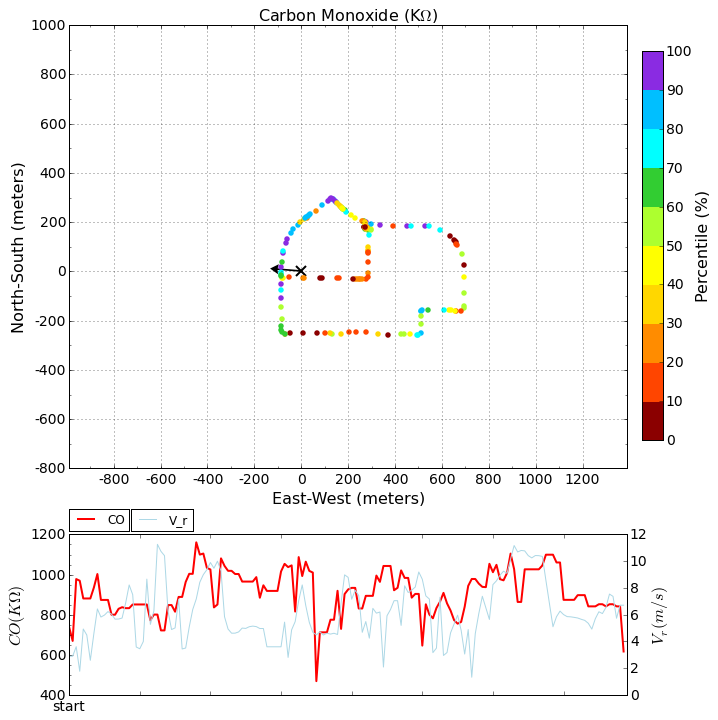

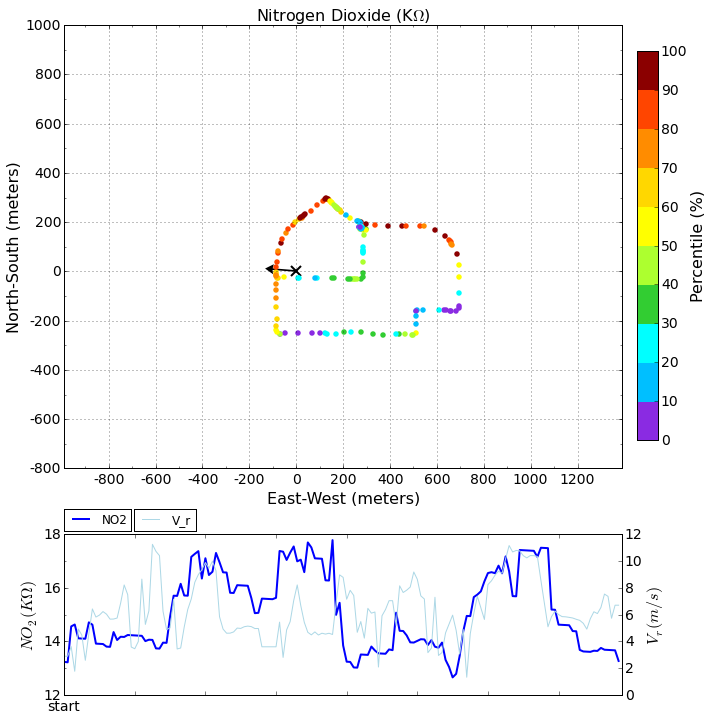

In [66]:
mapping_SCK1('Oct2.csv','Oct2_COplot.png','Oct2_NO2plot.png')

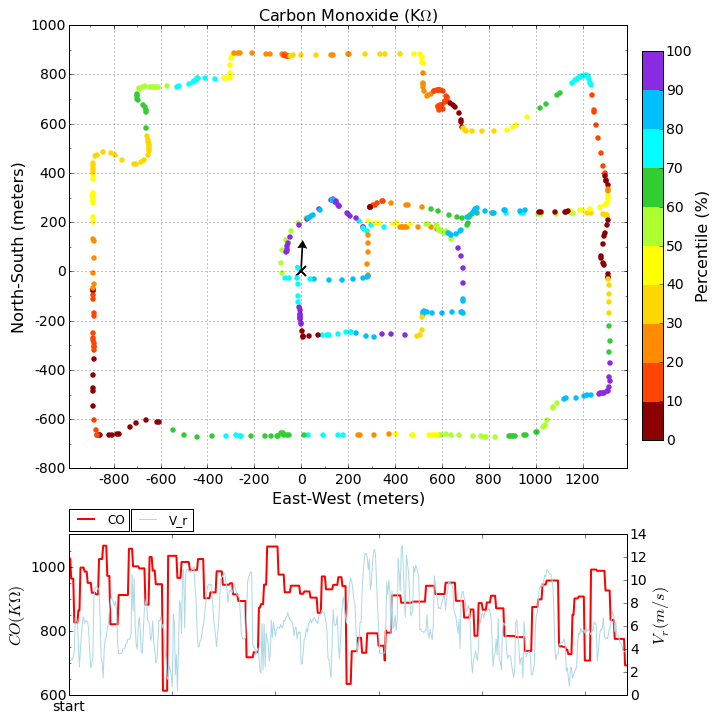

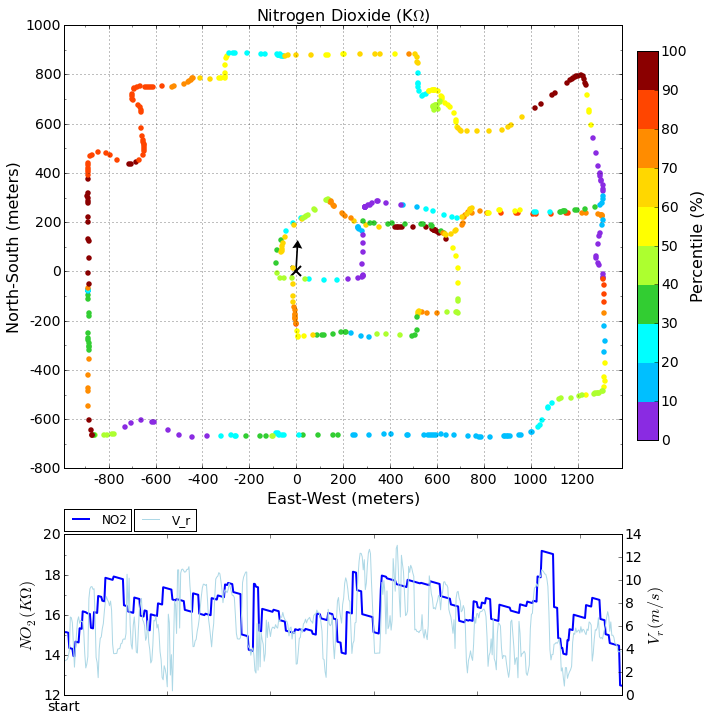

In [67]:
mapping_SCK1('Oct14.csv','Oct14_COplot.png','Oct14_NO2plot.png')

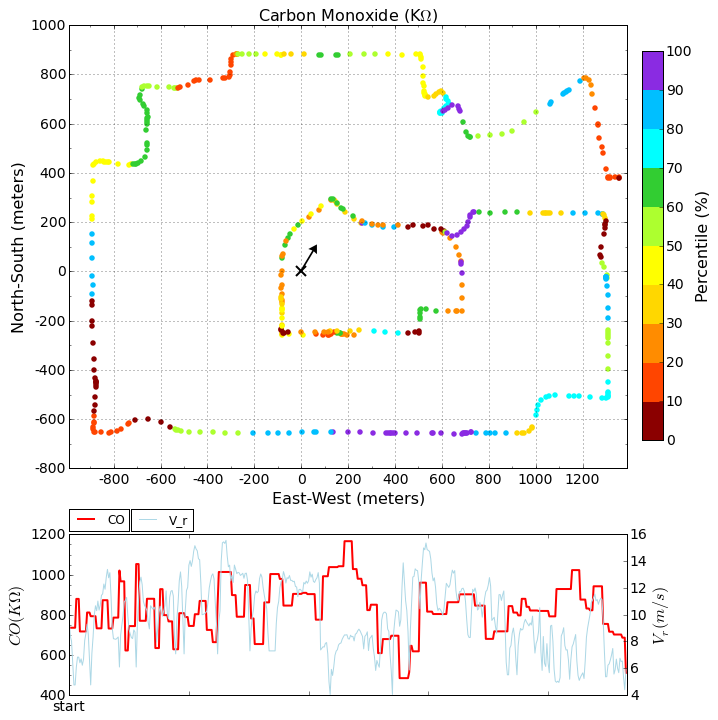

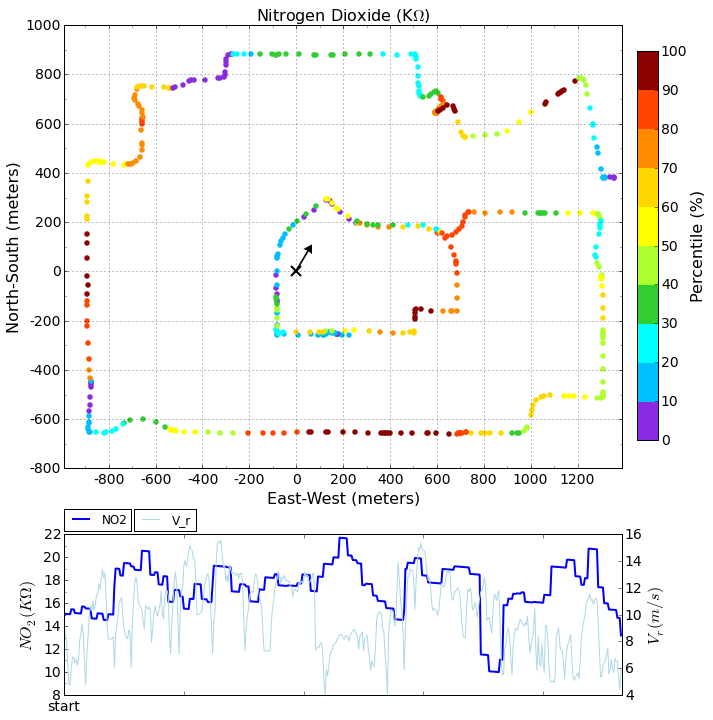

In [68]:
mapping_SCK1('Nov2.csv','Nov2_COplot.png','Nov2_NO2plot.png')

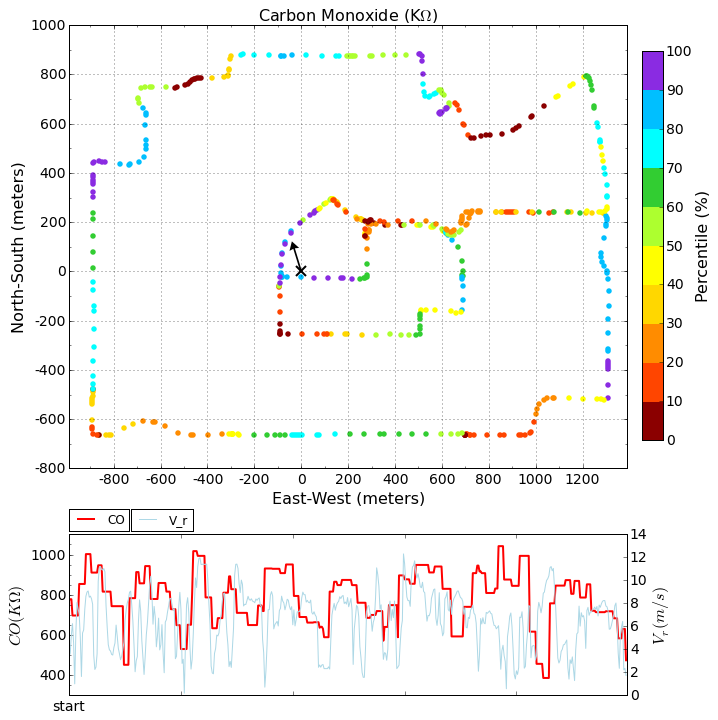

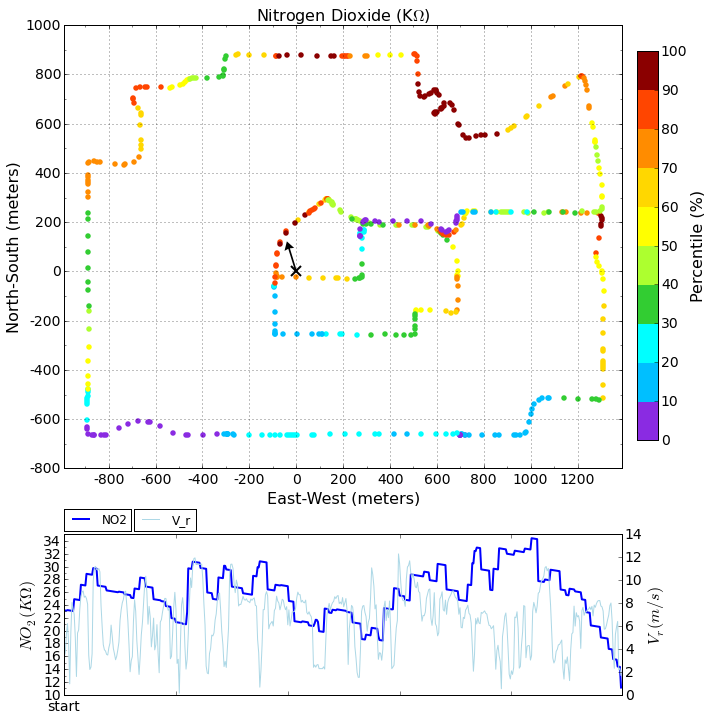

In [69]:
mapping_SCK1('Nov3.csv','Nov3_COplot.png','Nov3_NO2plot.png')

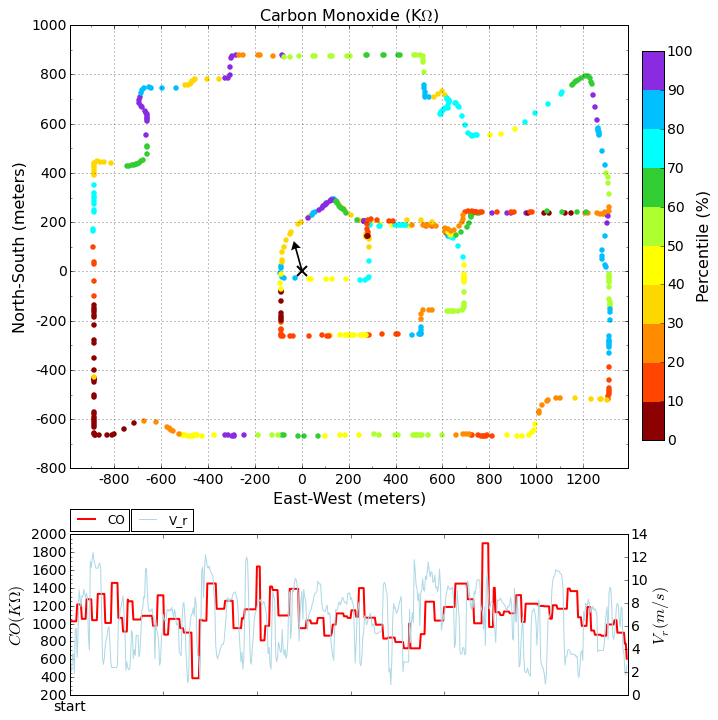

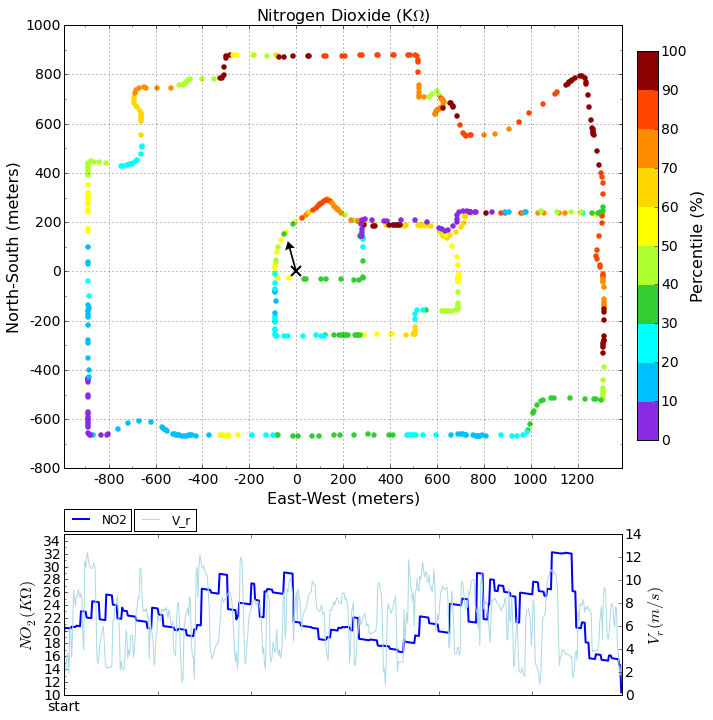

In [70]:
mapping_SCK1('Nov4.csv','Nov4_COplot.png','Nov4_NO2plot.png')

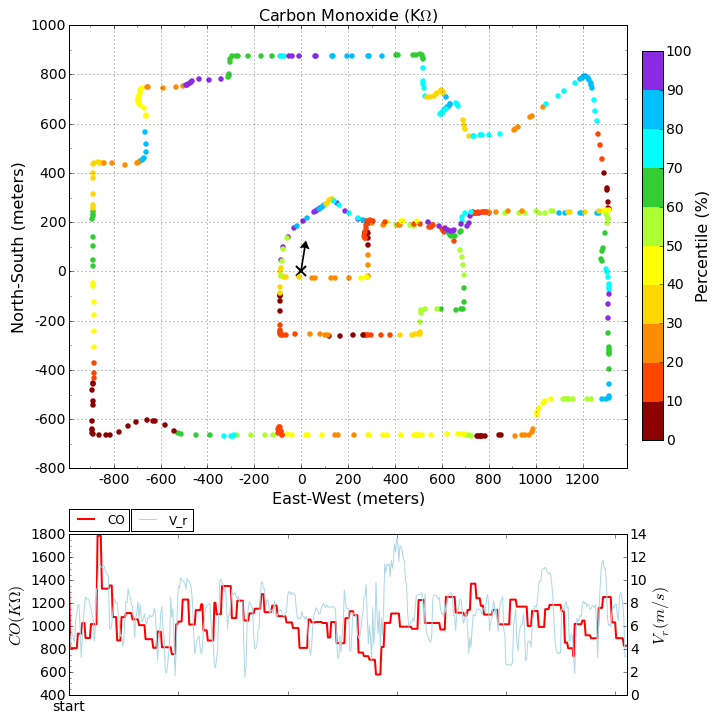

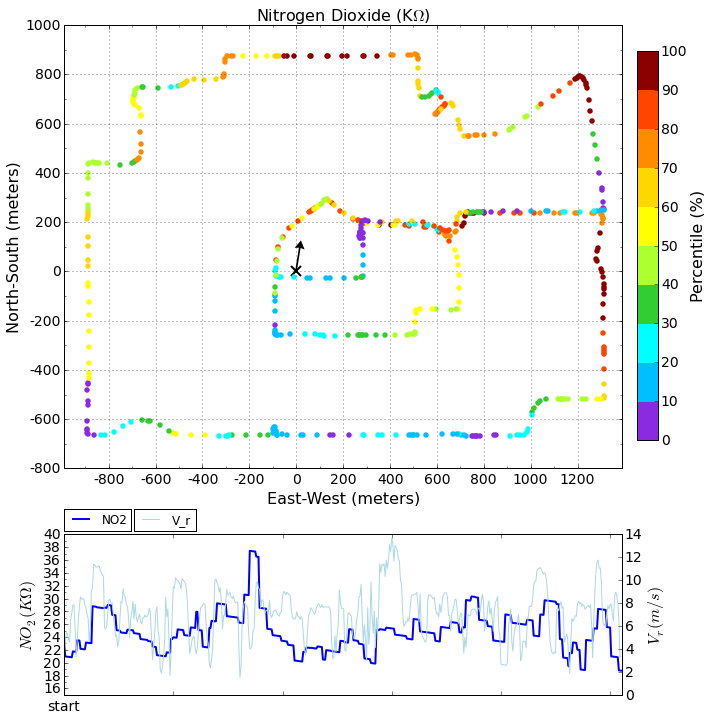

In [71]:
mapping_SCK1('Nov10.csv','Nov10_COplot.png','Nov10_NO2plot.png')

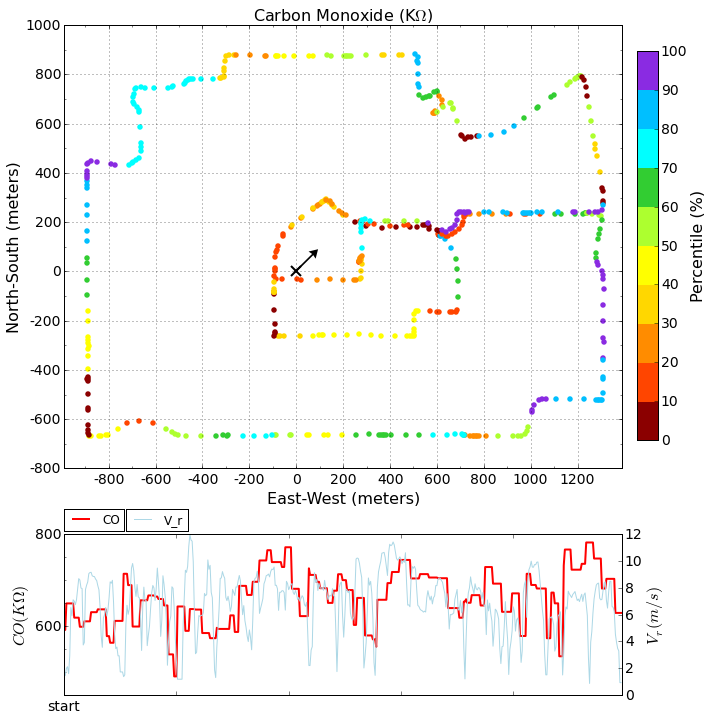

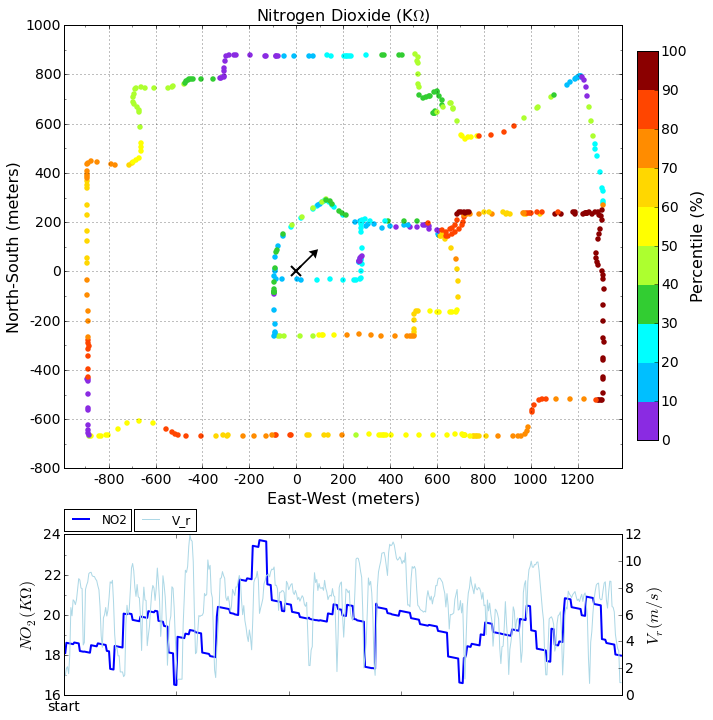

In [72]:
mapping_SCK1('Feb19.csv','Feb19_COplot.png','Feb19_NO2plot.png')

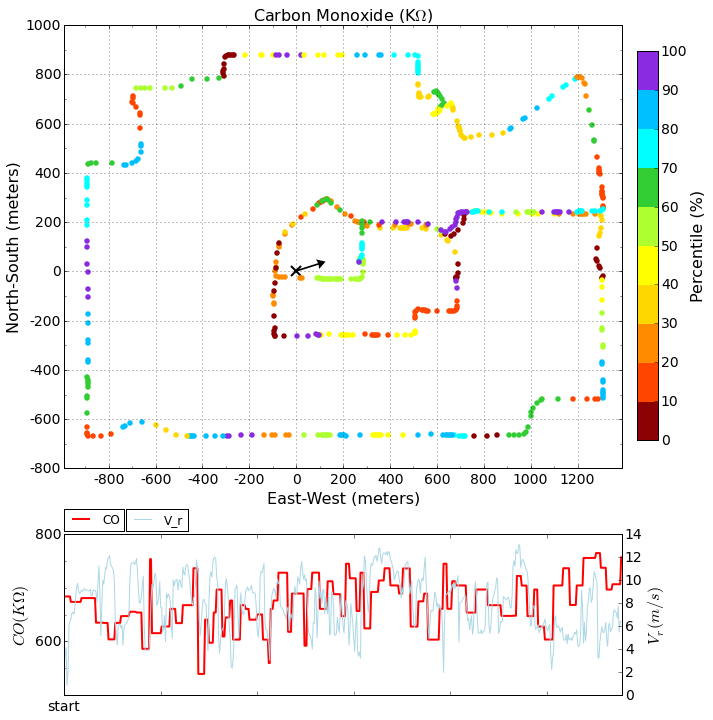

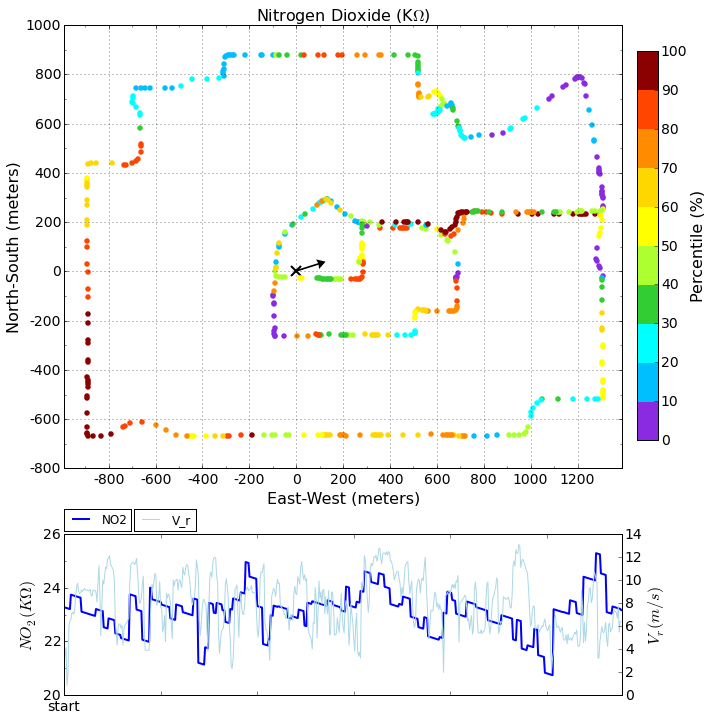

In [73]:
mapping_SCK1('Feb20.csv','Feb20_COplot.png','Feb20_NO2plot.png')

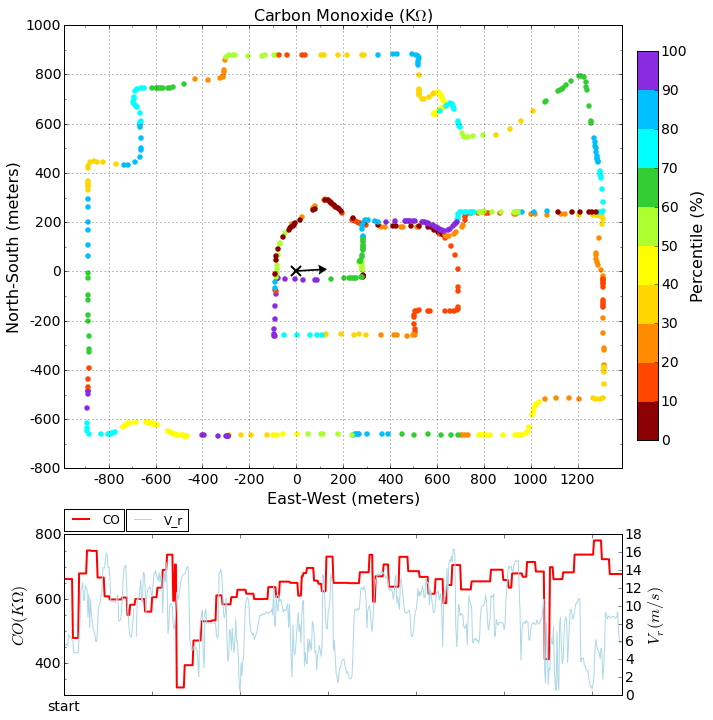

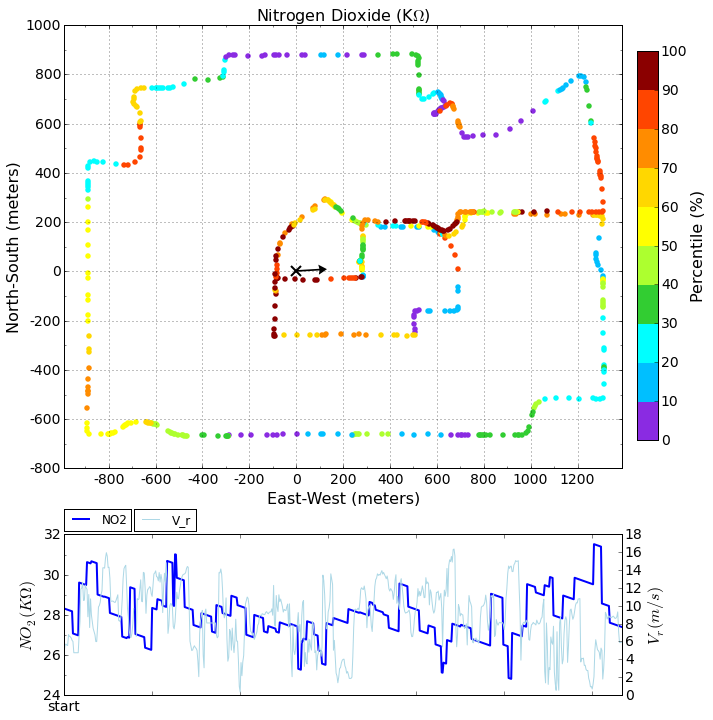

In [74]:
mapping_SCK1('Mar2.csv','Mar2_COplot.png','Mar2_NO2plot.png')

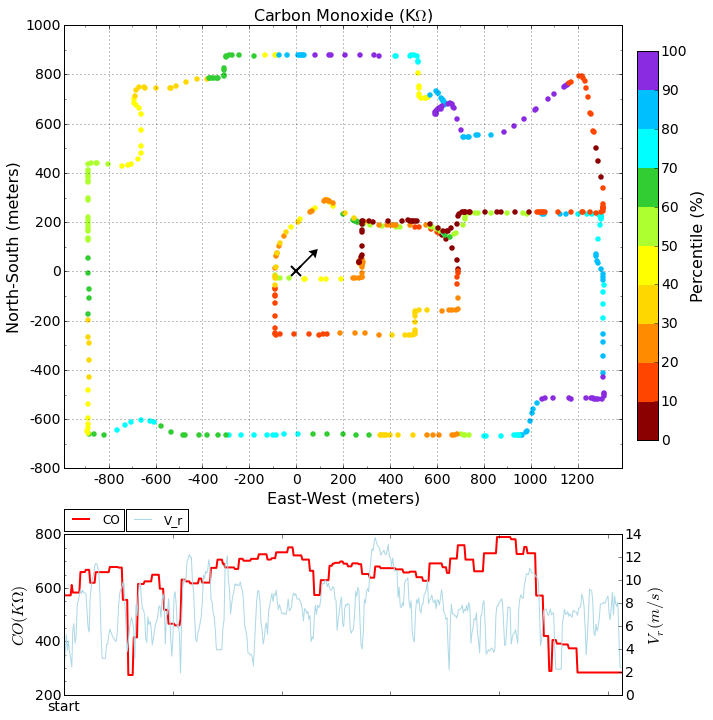

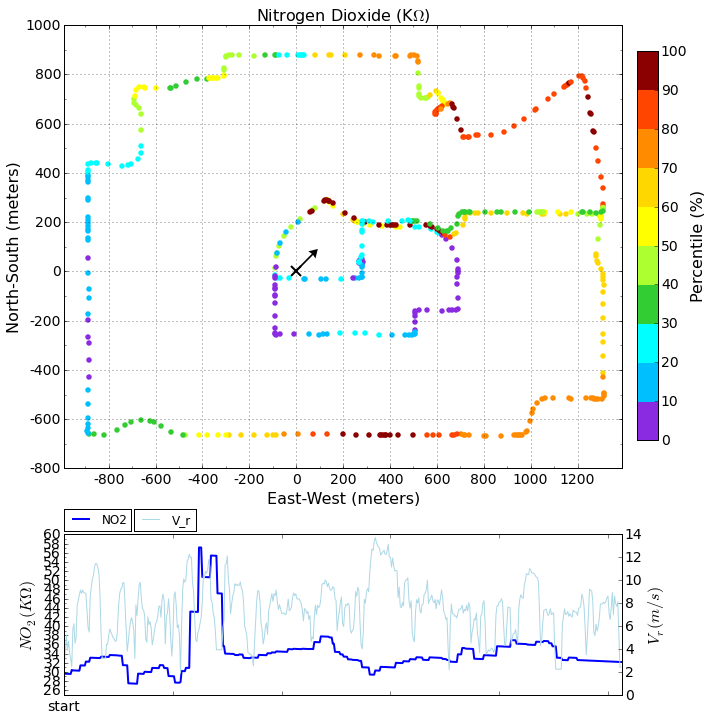

In [75]:
mapping_SCK1('Mar4.csv','Mar4_COplot.png','Mar4_NO2plot.png')

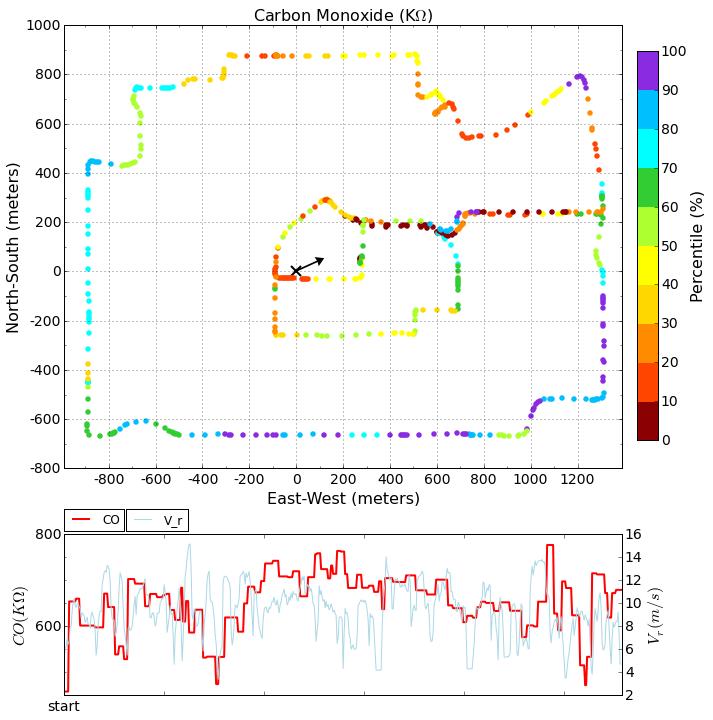

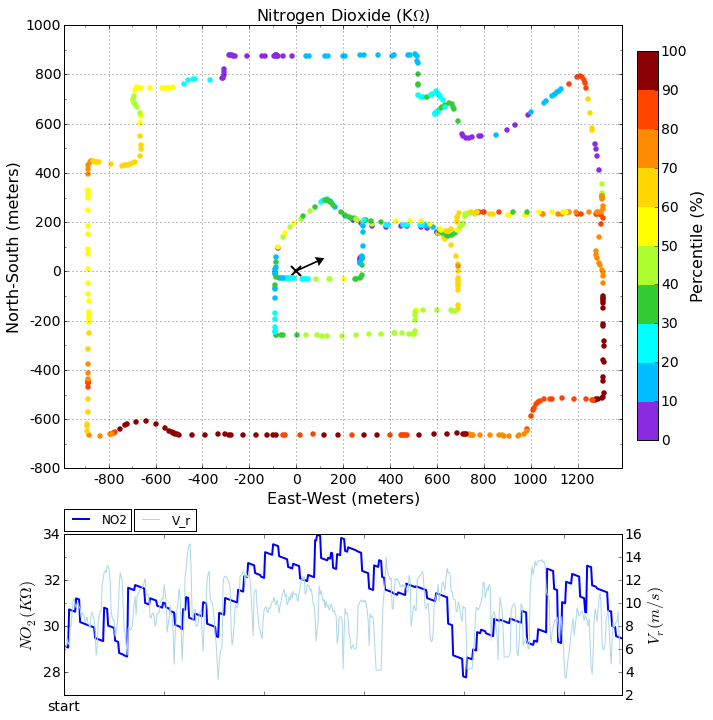

In [76]:
mapping_SCK1('Mar7.csv','Mar7_COplot.png','Mar7_NO2plot.png')

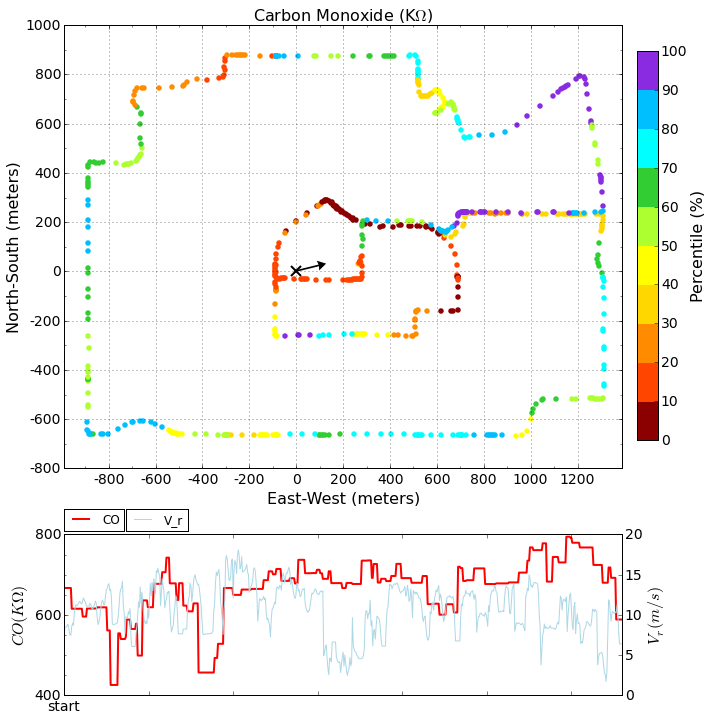

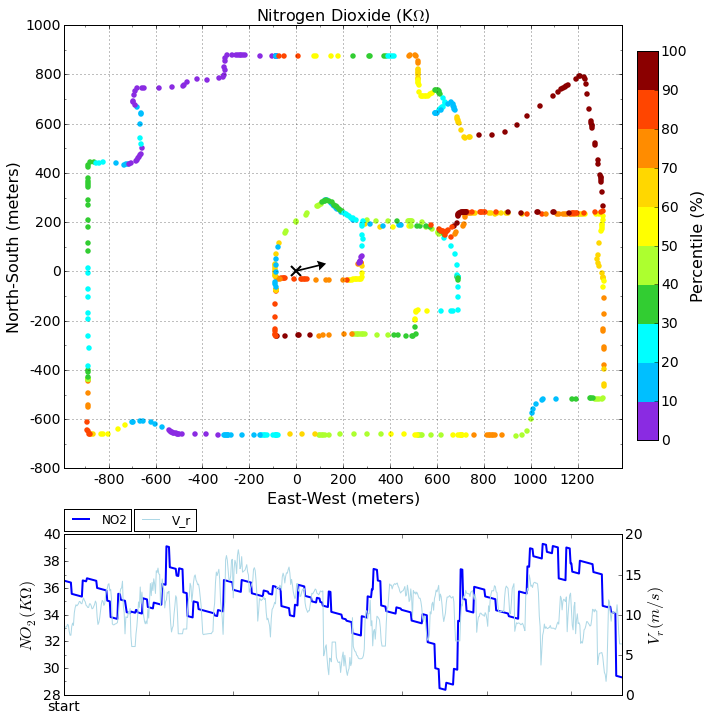

In [77]:
mapping_SCK1('Mar14.csv','Mar14_COplot.png','Mar14_NO2plot.png')

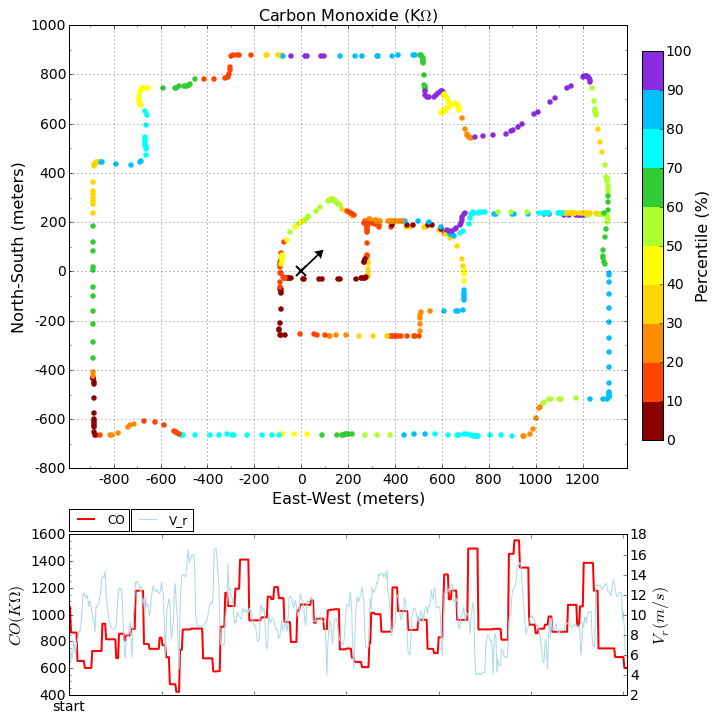

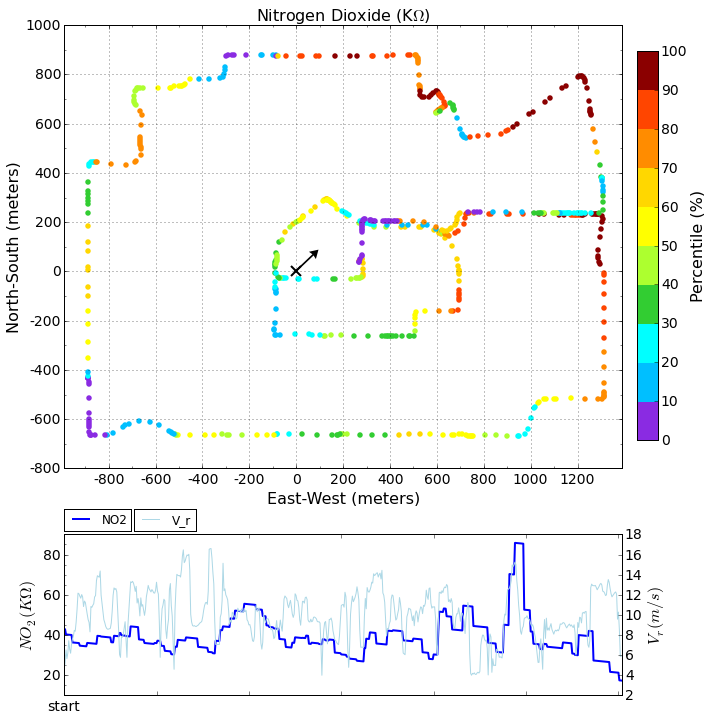

In [98]:
mapping_SCK1('Mar21.csv','Mar21_COplot.png','Mar21_NO2plot.png')

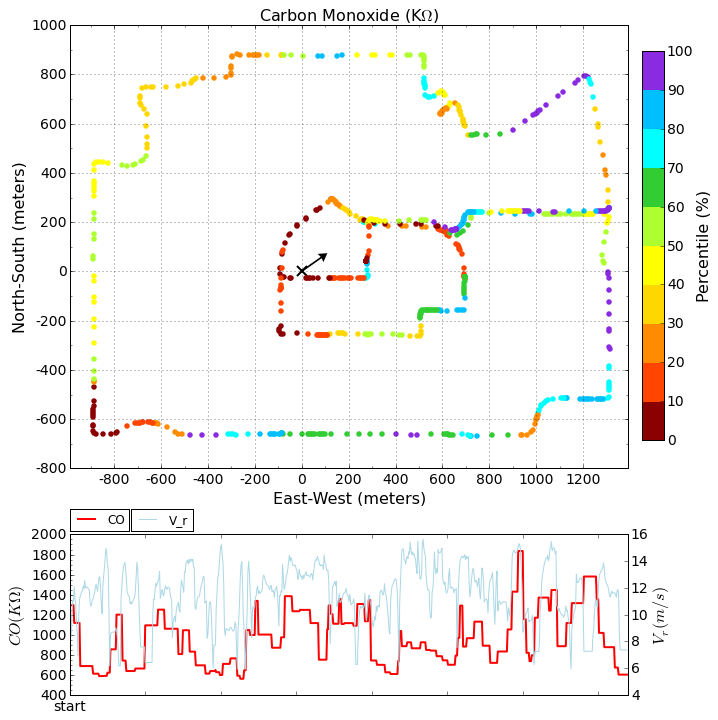

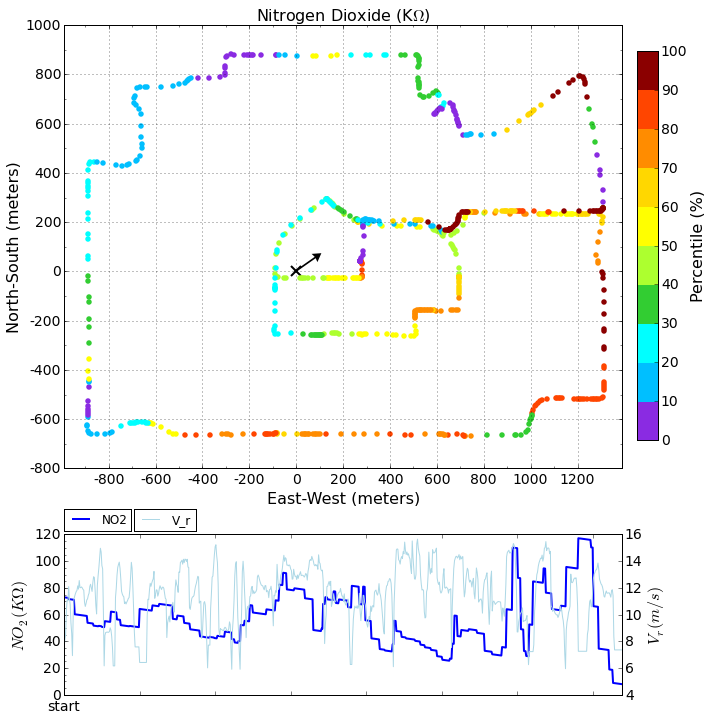

In [99]:
mapping_SCK1('Mar22.csv','Mar22_COplot.png','Mar22_NO2plot.png')

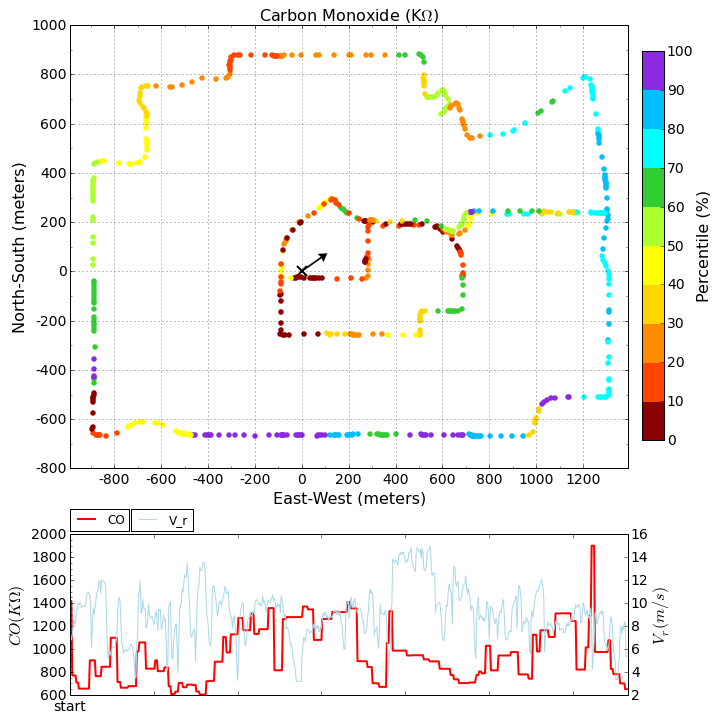

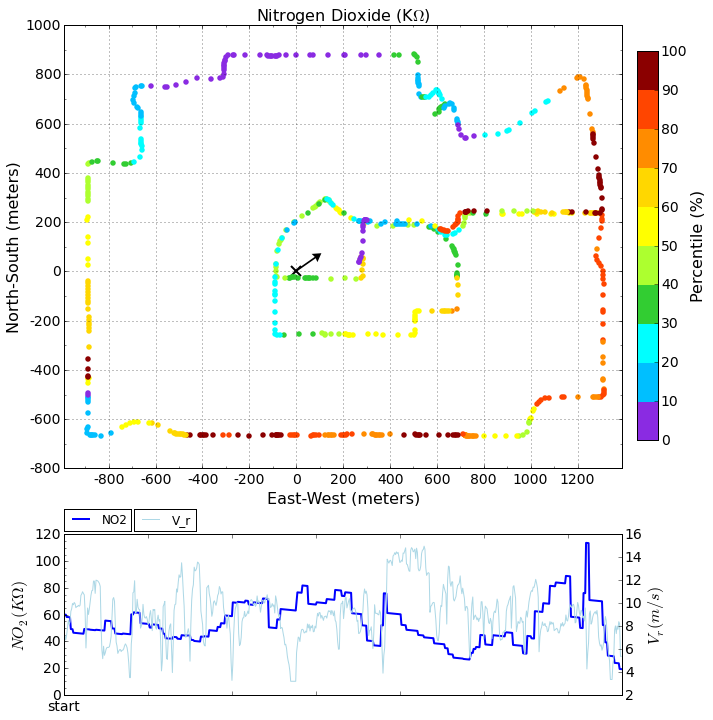

In [100]:
mapping_SCK1('Mar25.csv','Mar25_COplot.png','Mar25_NO2plot.png')

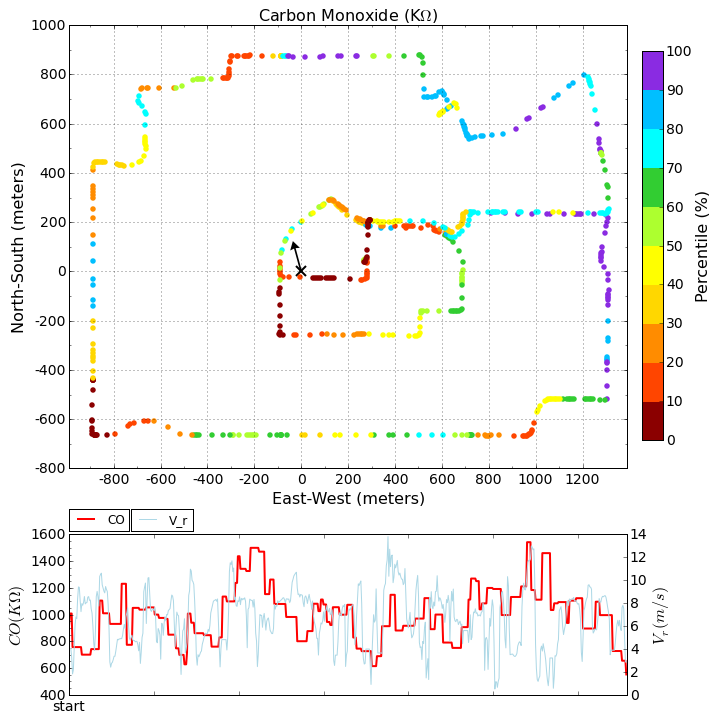

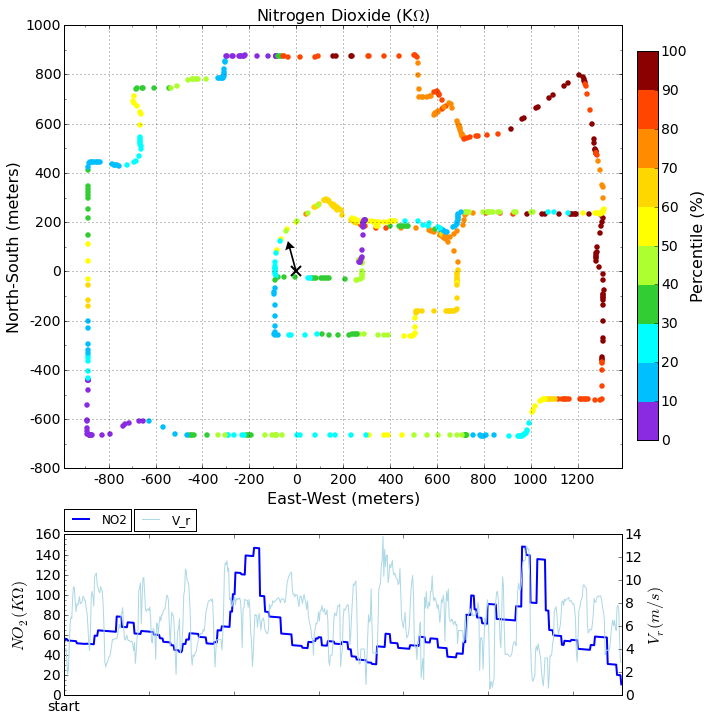

In [101]:
mapping_SCK1('Mar28.csv','Mar28_COplot.png','Mar28_NO2plot.png')

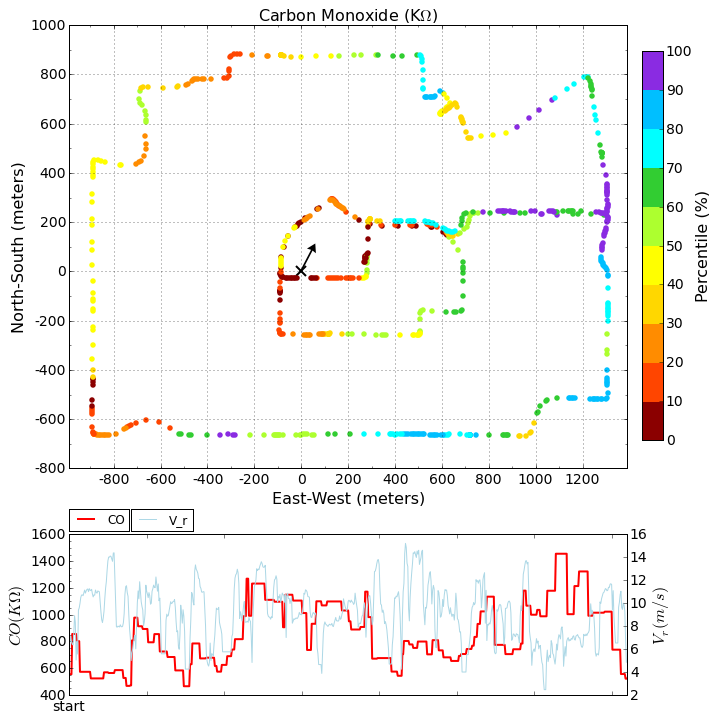

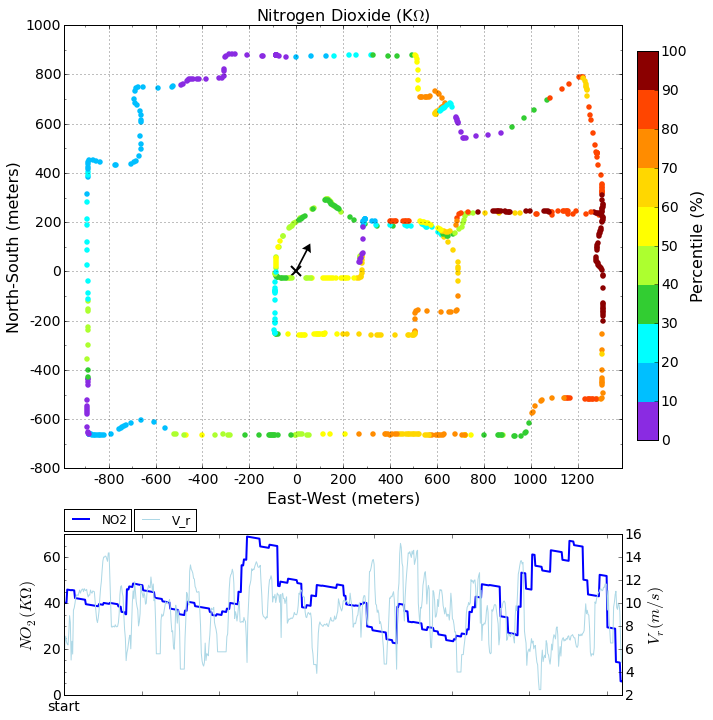

In [102]:
mapping_SCK1('Mar29.csv','Mar29_COplot.png','Mar29_NO2plot.png')

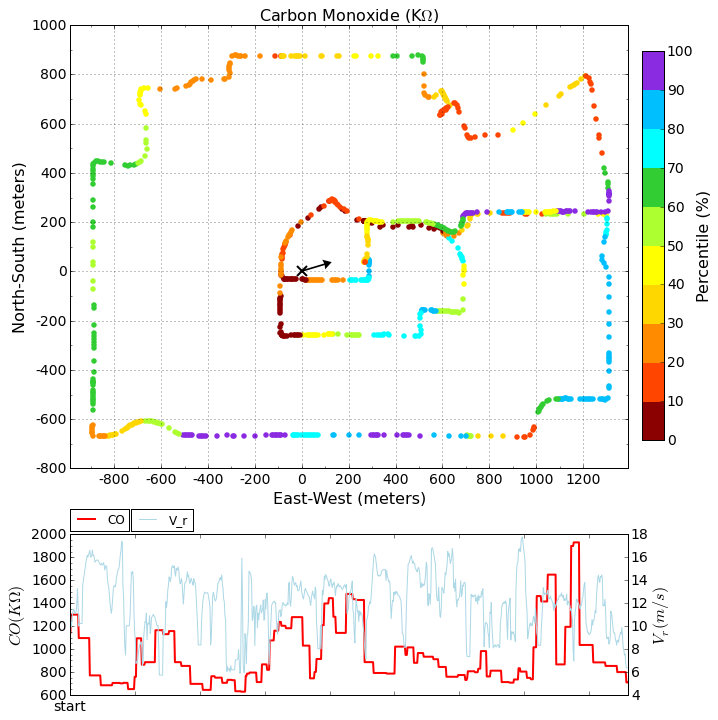

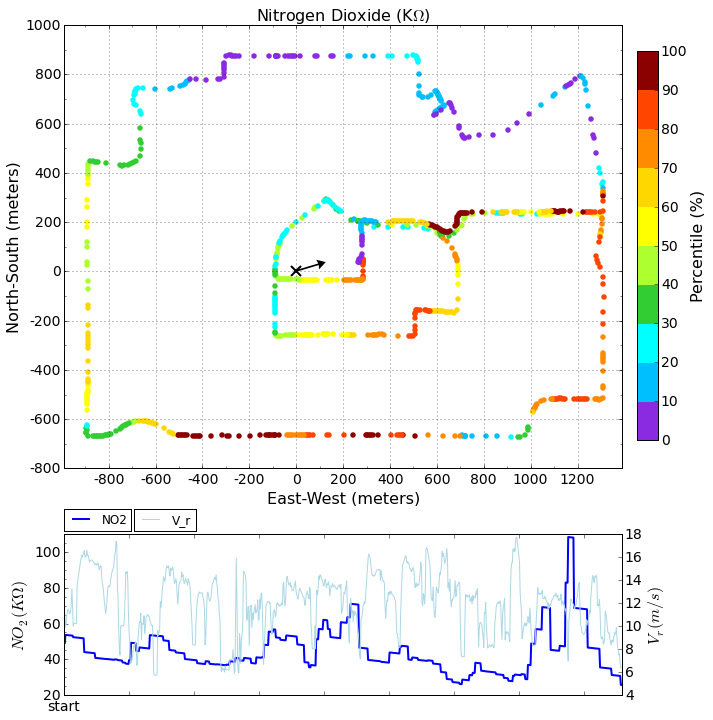

In [103]:
mapping_SCK1('Mar30.csv','Mar30_COplot.png','Mar30_NO2plot.png')

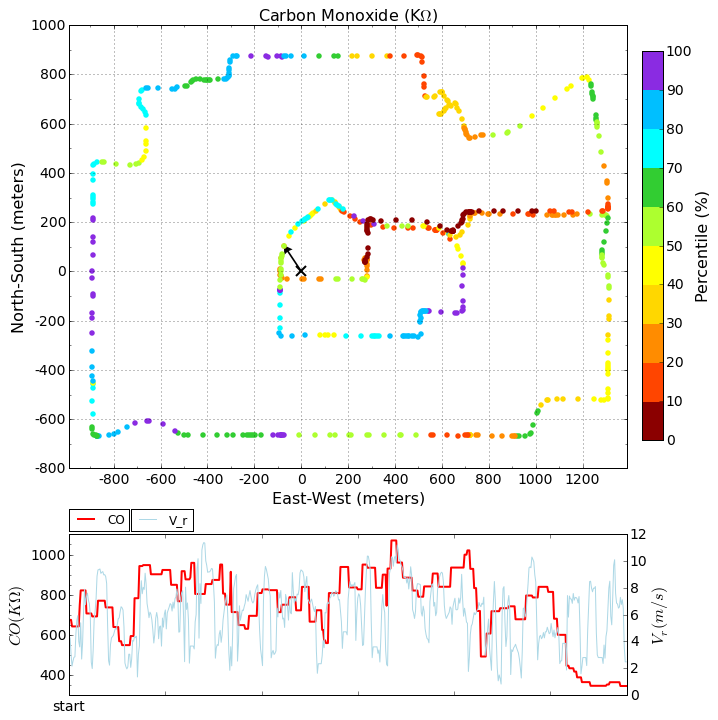

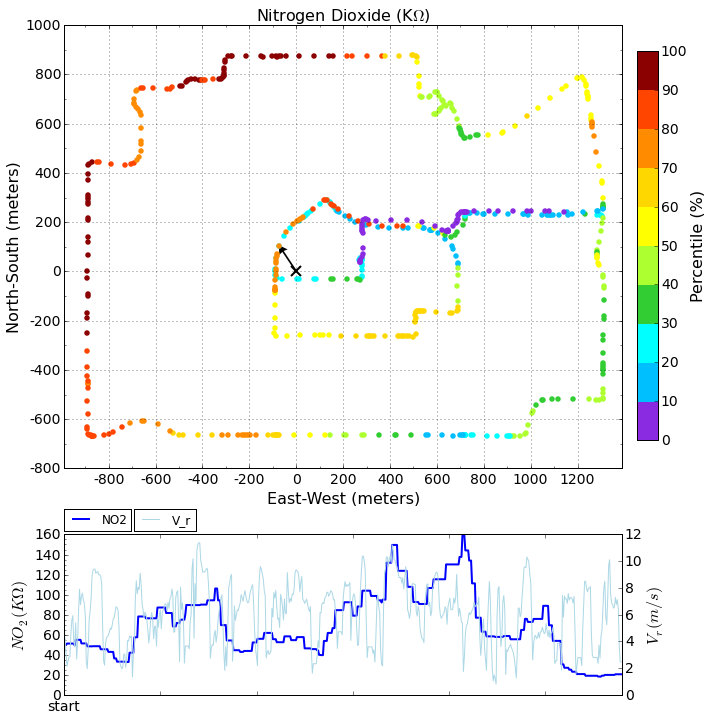

In [104]:
mapping_SCK1('Apr4.csv','Apr4_COplot.png','Apr4_NO2plot.png')

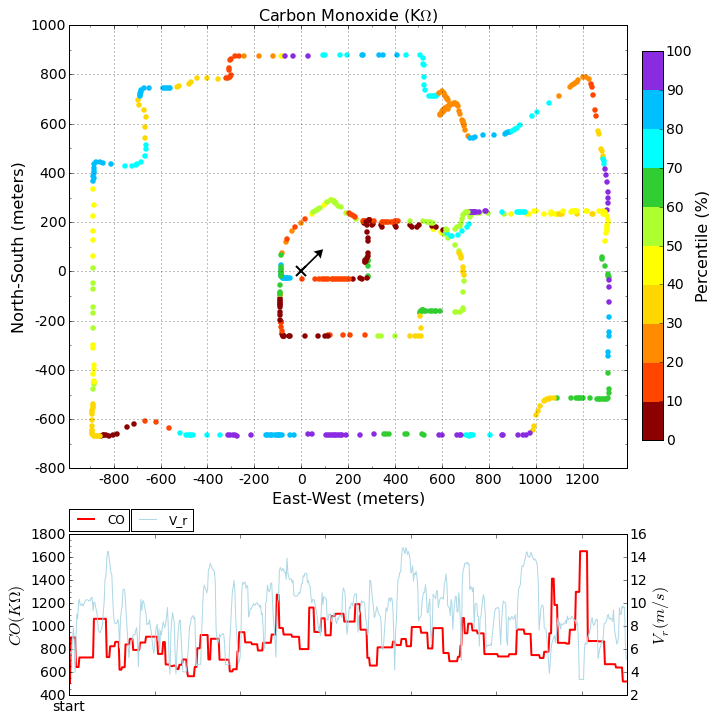

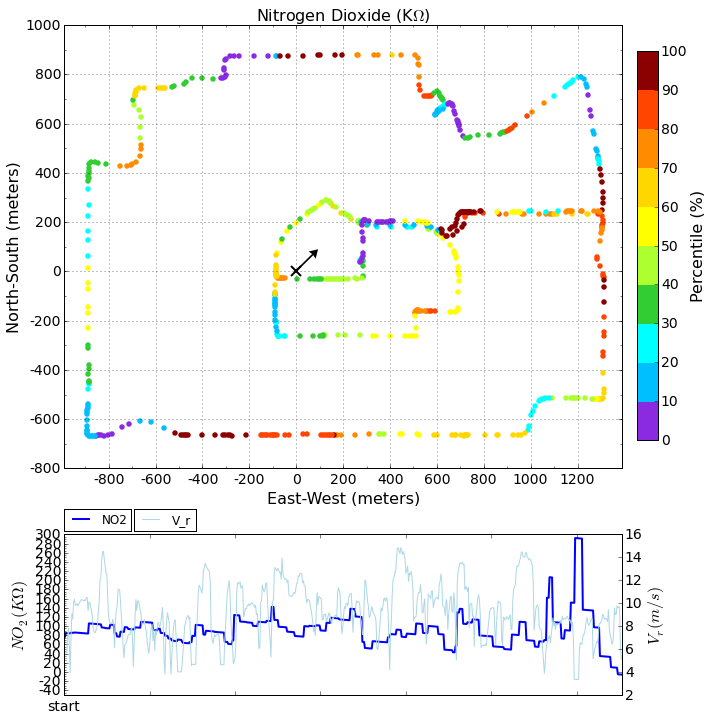

In [105]:
mapping_SCK1('Apr5.csv','Apr5_COplot.png','Apr5_NO2plot.png')

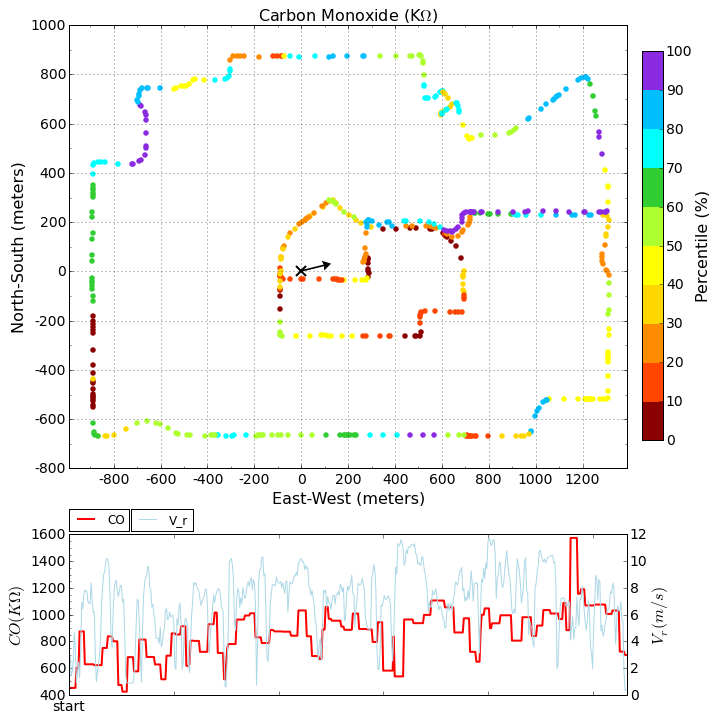

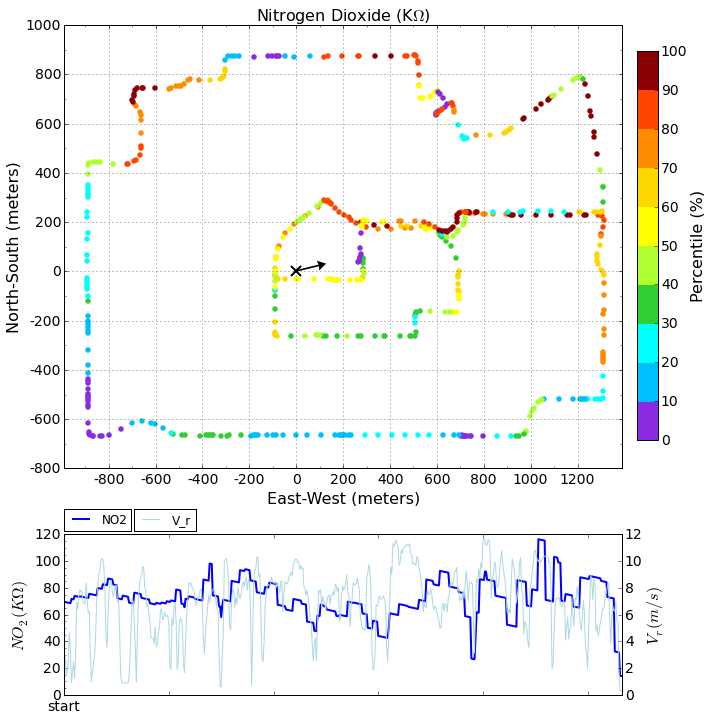

In [106]:
mapping_SCK1('Apr6.csv','Apr6_COplot.png','Apr6_NO2plot.png')

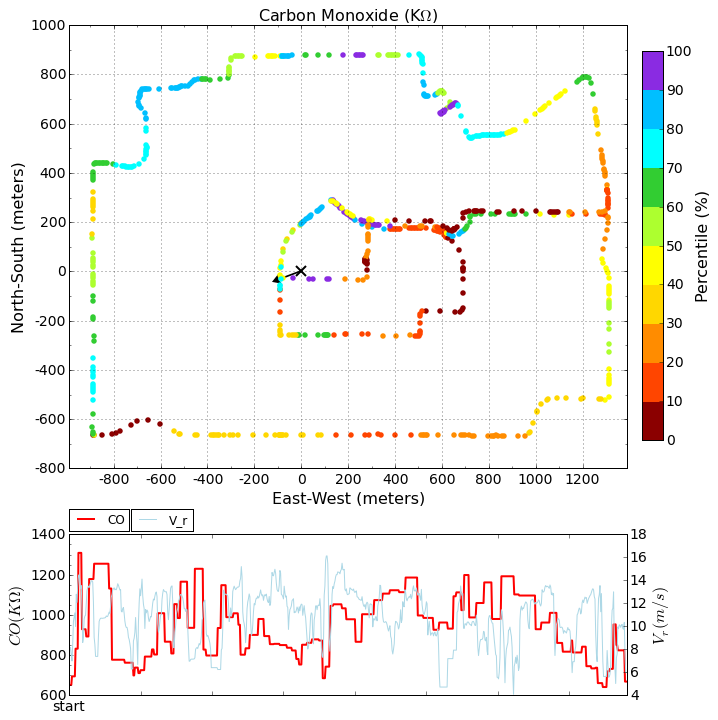

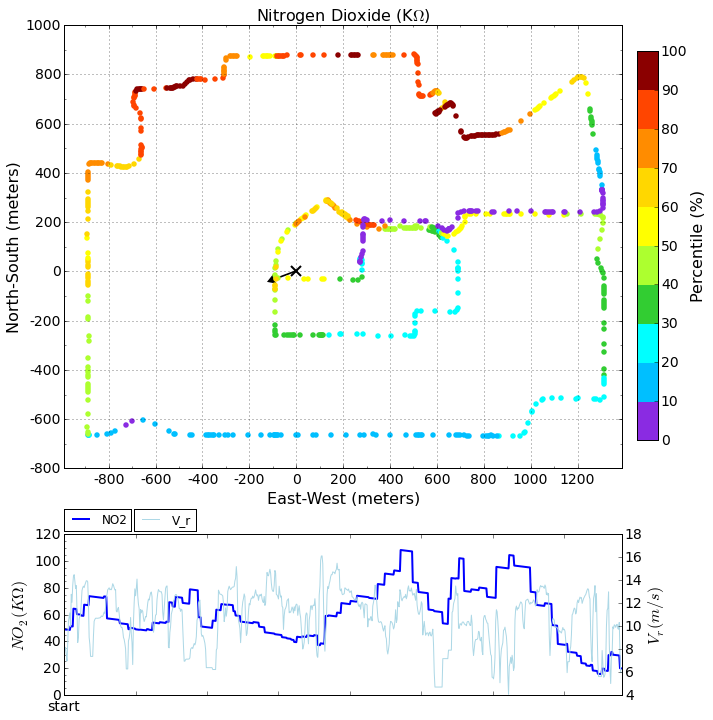

In [89]:
mapping_SCK1('Apr7.csv','Apr7_COplot.png','Apr7_NO2plot.png')

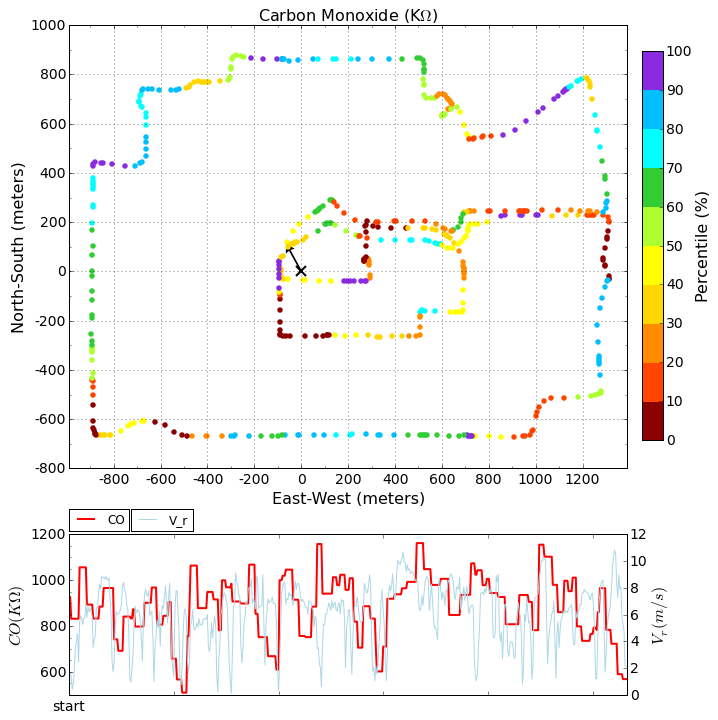

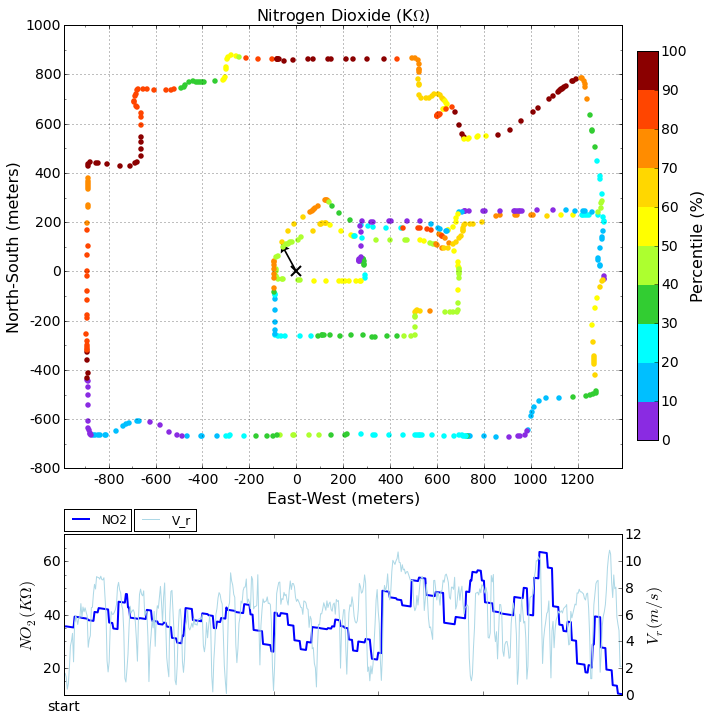

In [90]:
mapping_SCK1('Apr13.csv','Apr13_COplot.png','Apr13_NO2plot.png')

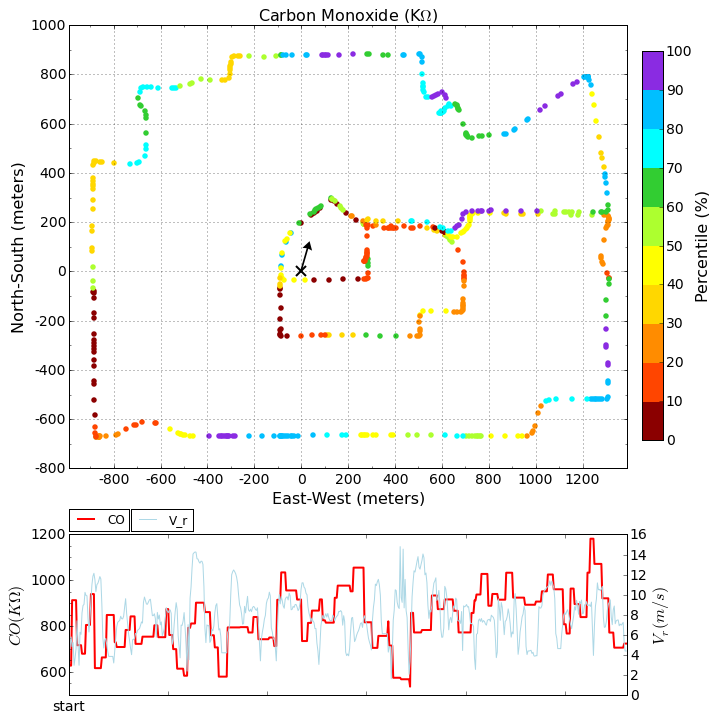

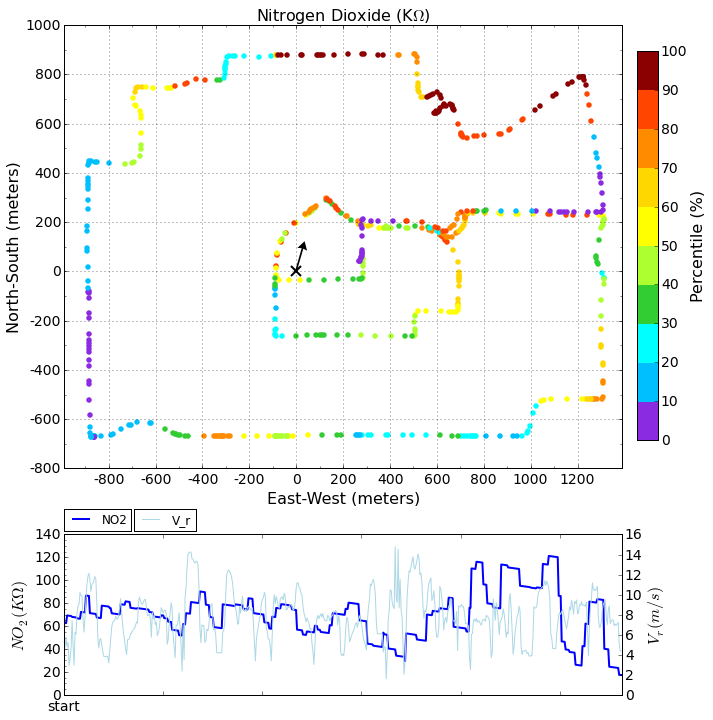

In [91]:
mapping_SCK1('Apr14.csv','Apr14_COplot.png','Apr14_NO2plot.png')

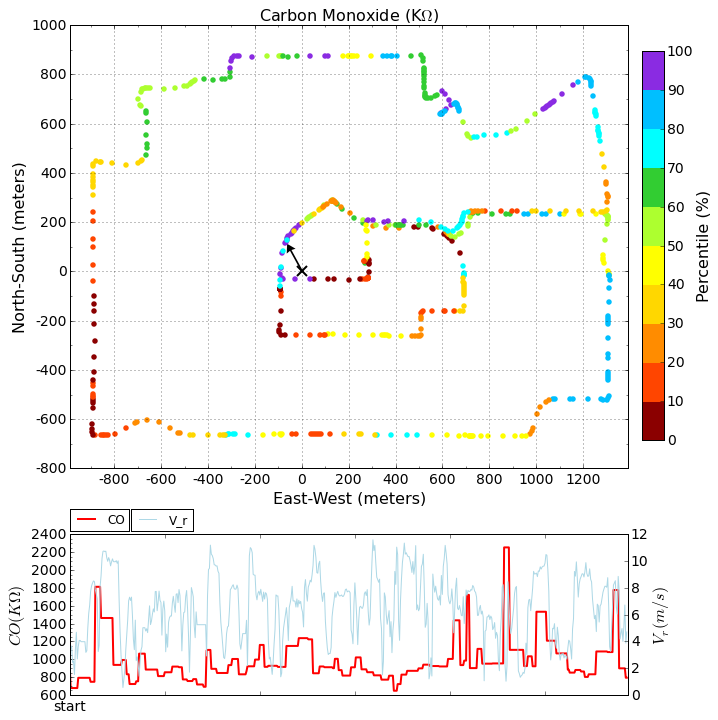

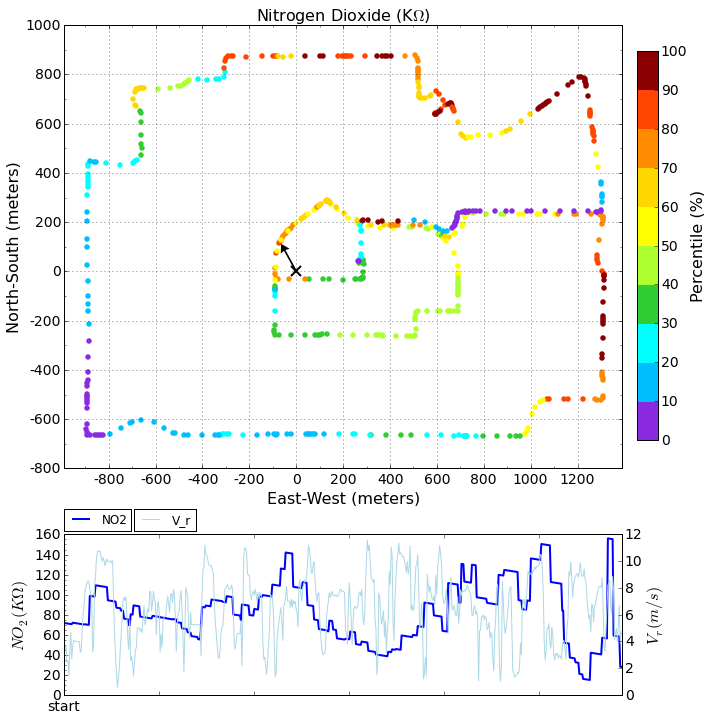

In [92]:
mapping_SCK1('Apr15.csv','Apr15_COplot.png','Apr15_NO2plot.png')

In [107]:
#mapping_SCK1('Apr27.csv','Apr27_COplot.png','Apr27_NO2plot.png')

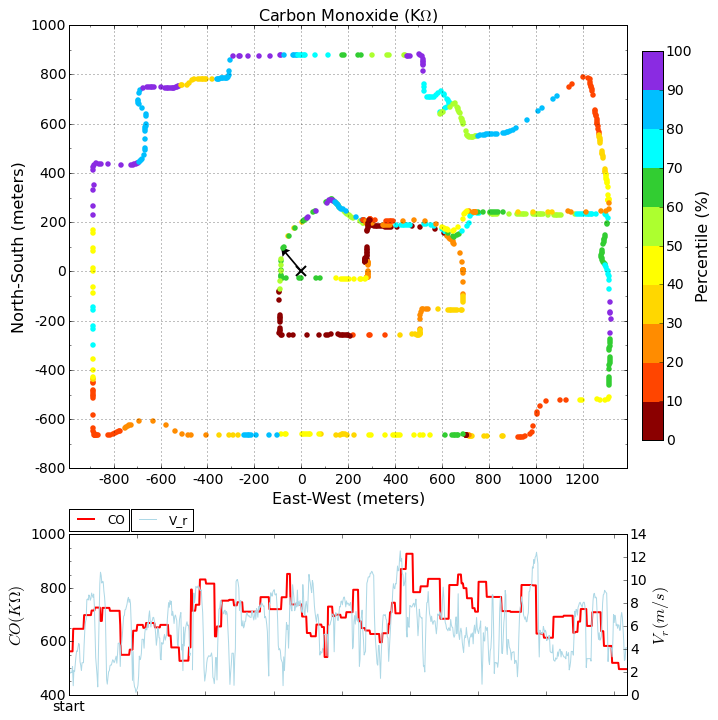

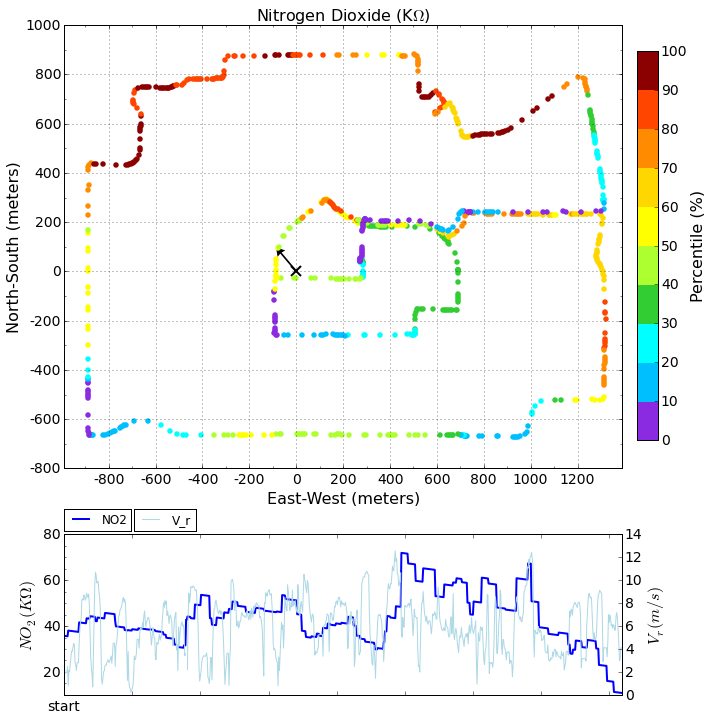

In [94]:
mapping_SCK1('Apr28.csv','Apr28_COplot.png','Apr28_NO2plot.png')

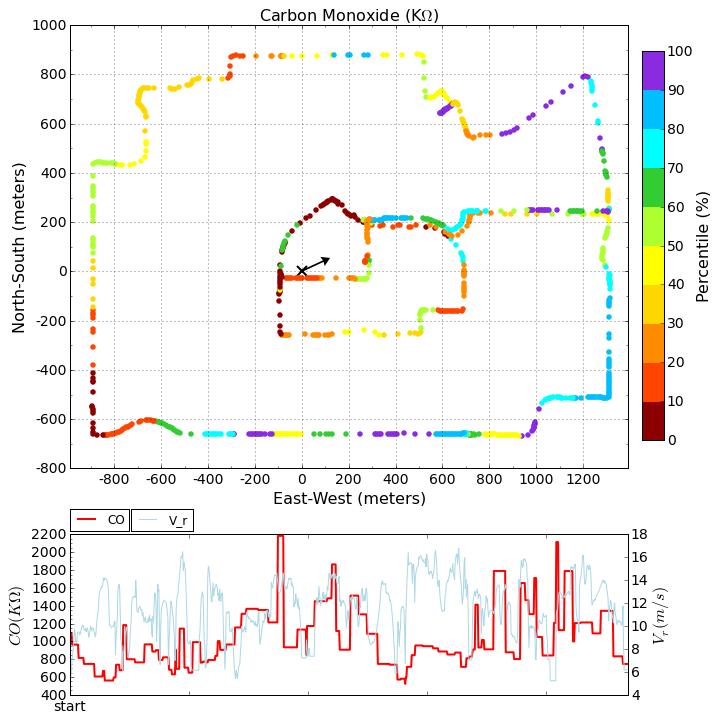

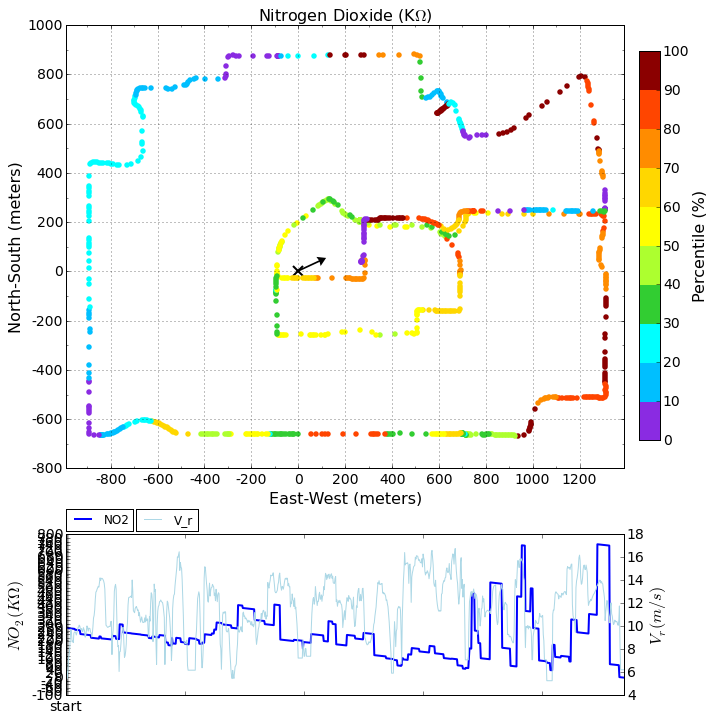

In [108]:
mapping_SCK1('Apr29.csv','Apr29_COplot.png','Apr29_NO2plot.png')

In [109]:
#mapping_SCK1('May5.csv','May5_COplot.png','May5_NO2plot.png')

In [110]:
#mapping_SCK1('May6.csv','May6_COplot.png','May6_NO2plot.png')